In [23]:
import pandas as pd
import pandas.plotting as pd_plotting
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [24]:
FILEPATH = 'Spotify_Youtube.csv'
TARGET_COLUMN = 'Views' # Target for regression task
TEST_SIZE = 0.2
RANDOM_STATE = 42

music_df = pd.read_csv('Spotify_Youtube.csv')
print(music_df.isnull().sum())

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64


In [25]:
print(f"--- 3: Loading Data from {FILEPATH} ---")
df = pd.read_csv(FILEPATH)
print(f"Data loaded successfully. Shape: {df.shape}")

print("\n--- Initial Data Info ---")
print(df.info())
print("\n--- Data Head ---")
print(df.head())

--- 3: Loading Data from Spotify_Youtube.csv ---
Data loaded successfully. Shape: (20718, 28)

--- Initial Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness     

In [26]:
print("\n--- 4: Cleaning Data ---")

# --- 4a: Drop Unnamed Column ---
if df.columns[0].startswith('Unnamed:'):
    print(f"Dropping the first unnamed column: {df.columns[0]}")
    df = df.iloc[:, 1:]
else:
    print("First column is not unnamed, not dropping.")

# --- 4b: Handle Missing Values ---
initial_rows = len(df)
df.dropna(inplace=True)
rows_dropped = initial_rows - len(df)
if rows_dropped > 0:
    print(f"Dropped {rows_dropped} rows with missing values.")
else:
    print("No rows with missing values found.")
print(f"DataFrame shape after cleaning: {df.shape}")

# --- 4c: Placeholder for Outlier Handling ---
print("\nPlaceholder: Outlier detection and handling needed.")

# --- 4d: Placeholder for Incorrectly Labeled Points ---
print("Placeholder: Handling of incorrectly labeled points needed.")



--- 4: Cleaning Data ---
Dropping the first unnamed column: Unnamed: 0
Dropped 1548 rows with missing values.
DataFrame shape after cleaning: (19170, 27)

Placeholder: Outlier detection and handling needed.
Placeholder: Handling of incorrectly labeled points needed.


In [27]:
print("\n--- 5: Encoding Categorical Features ---")
label_encoders = {}
# Identify object columns that are likely categorical
# Adjust this list based on actual dataset analysis
cols_to_encode = ['Track', 'Artist', 'Album'] # Add other relevant object columns

for col in cols_to_encode:
    if col in df.columns:
        if df[col].dtype == 'object':
            print(f"Encoding categorical column: {col}")
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            label_encoders[col] = le # Store encoder if needed later
        else:
             print(f"Skipping encoding for non-object column: {col}")
    else:
        print(f"Warning: Column '{col}' not found for encoding.")
print(f"DataFrame shape after encoding: {df.shape}")


--- 5: Encoding Categorical Features ---
Encoding categorical column: Track
Encoding categorical column: Artist
Encoding categorical column: Album
DataFrame shape after encoding: (19170, 27)


In [28]:
print("\n--- 6: Feature Selection ---")

# Drop columns that don't add value for ML predictions
columns_to_drop = [
    'Url_spotify',
    'Uri',
    'Url_youtube',
    'Description',
    'Licensed',
    'official_video'
]

# Drop the specified columns
df = df.drop(columns=columns_to_drop)
print(f"Dropped columns: {columns_to_drop}")
print(f"DataFrame shape after feature selection: {df.shape}")

# Display remaining columns
print("\nRemaining columns:")
print(df.columns.tolist())


--- 6: Feature Selection ---
Dropped columns: ['Url_spotify', 'Uri', 'Url_youtube', 'Description', 'Licensed', 'official_video']
DataFrame shape after feature selection: (19170, 21)

Remaining columns:
['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Title', 'Channel', 'Views', 'Likes', 'Comments', 'Stream']



--- 6.5: Feature Correlation Analysis ---
Correlation heatmap saved as 'correlation_heatmap.png'

Top correlations with Views:
Views               1.000000
Likes               0.891852
Stream              0.604195
Comments            0.431122
Loudness            0.118406
Danceability        0.089105
Energy              0.066530
Valence             0.038699
Duration_ms         0.021547
Key                 0.009293
Album               0.005769
Track               0.002414
Tempo              -0.001373
Speechiness        -0.008672
Liveness           -0.017140
Artist             -0.026139
Acousticness       -0.069905
Instrumentalness   -0.080820
Name: Views, dtype: float64

Checking for multicollinearity (corr > 0.8):
Features with high correlation (potential multicollinearity):
  Likes & Views: 0.89


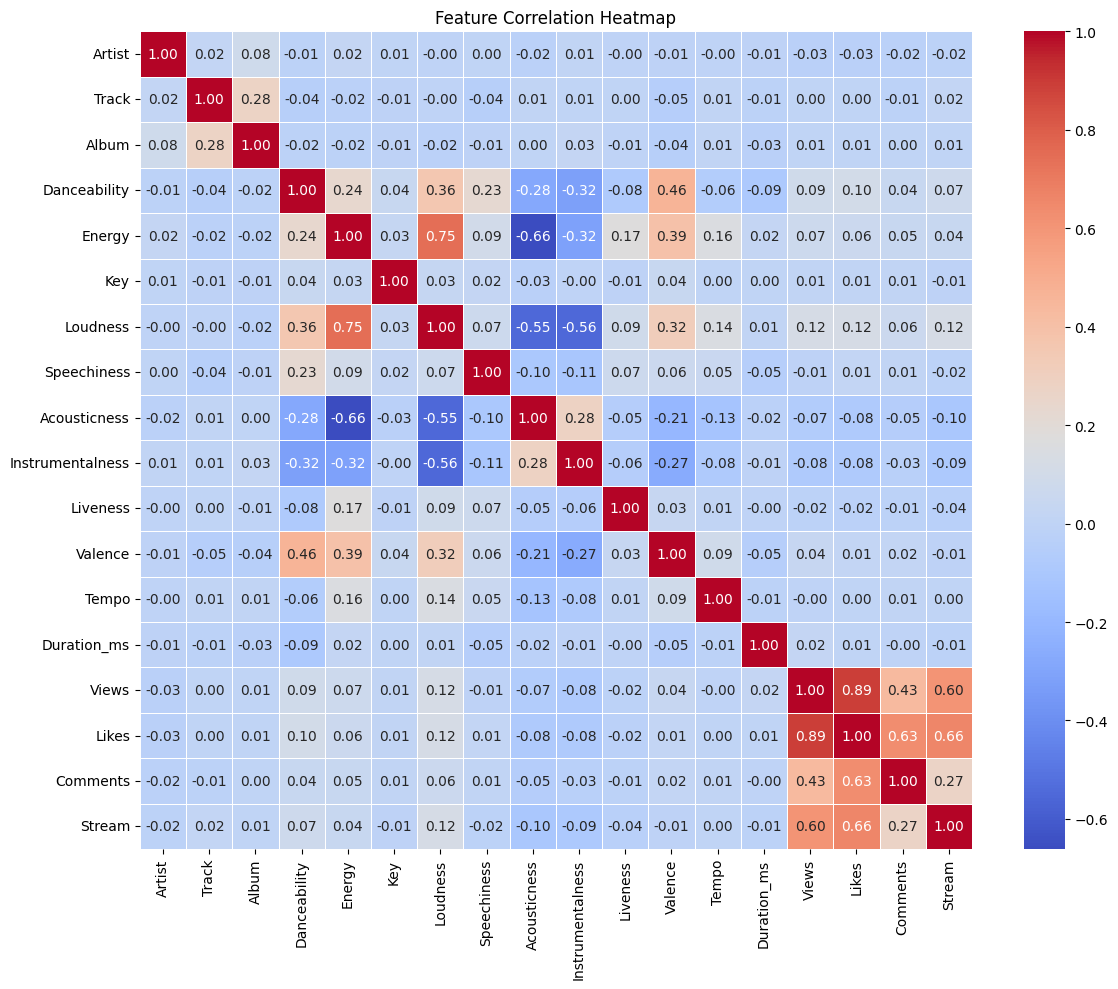

In [29]:
print("\n--- 6.5: Feature Correlation Analysis ---")

# Create a correlation matrix for numerical features
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
print("Correlation heatmap saved as 'correlation_heatmap.png'")

# Display top correlations with the target variable
if TARGET_COLUMN in numeric_df.columns:
    target_correlations = corr_matrix[TARGET_COLUMN].sort_values(ascending=False)
    print(f"\nTop correlations with {TARGET_COLUMN}:")
    print(target_correlations)
else:
    print(f"\nTarget column {TARGET_COLUMN} not found in numeric columns")

# Check for multicollinearity (features with high correlation > 0.8)
print("\nChecking for multicollinearity (corr > 0.8):")
high_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            high_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

if high_corr:
    print("Features with high correlation (potential multicollinearity):")
    for feat1, feat2, corr in high_corr:
        print(f"  {feat1} & {feat2}: {corr:.2f}")
else:
    print("No high correlation detected between features")


--- 6.6: PCA Analysis for View Prediction ---
Target variable 'Views' separated for visualization with PCA features
Features standardized, shape: (19170, 17)
PCA applied, reduced to 2 dimensions
Added log-transformed Views for visualization
Explained variance ratio: PC1 = 0.1874, PC2 = 0.1180
Total variance explained: 0.3054
PCA visualization saved as 'pca_visualization_views.png'

--- Creating 3D PCA Visualization ---
PCA 3D applied, reduced to 3 dimensions
Explained variance ratio: PC1=0.1874, PC2=0.1180, PC3=0.0778
Total variance explained by 3 components: 0.3833
3D PCA visualization saved as 'pca_3d_visualization.png'

Feature contributions to principal components:
                       PC1       PC2
Artist           -0.001666 -0.038349
Track            -0.024274  0.023484
Album            -0.023554  0.023678
Danceability      0.318612 -0.043573
Energy            0.452810 -0.135438
Key               0.032837 -0.012324
Loudness          0.475776 -0.081829
Speechiness       0.11866

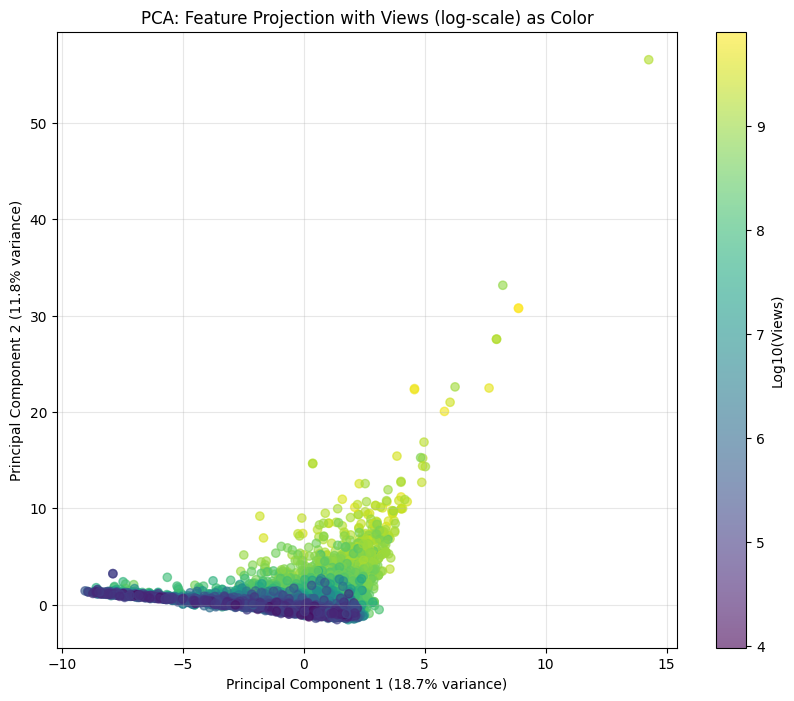

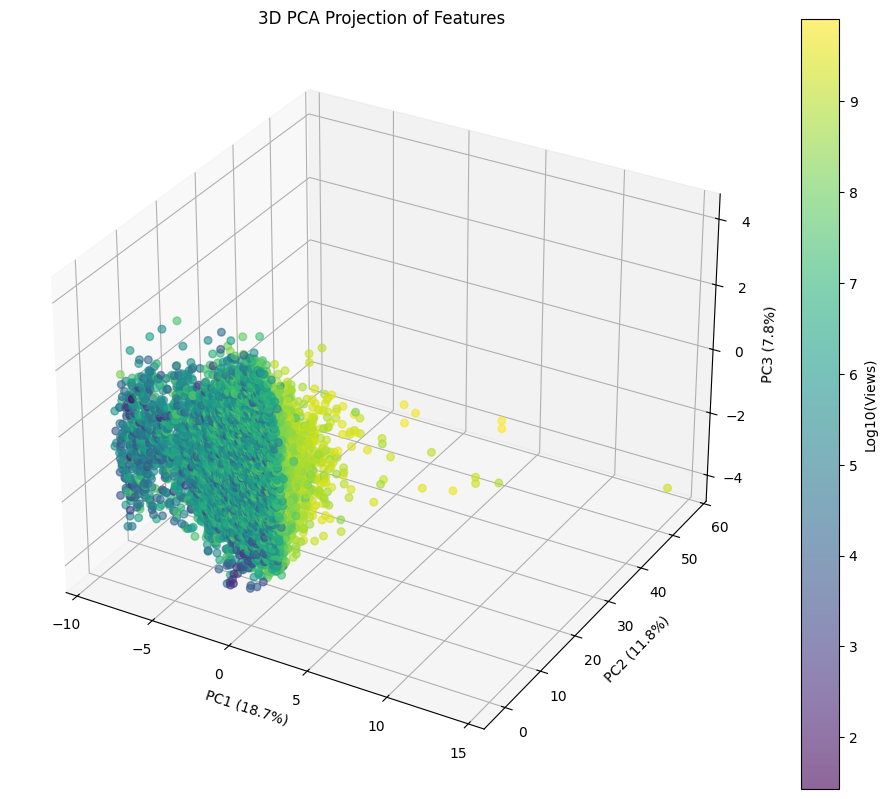

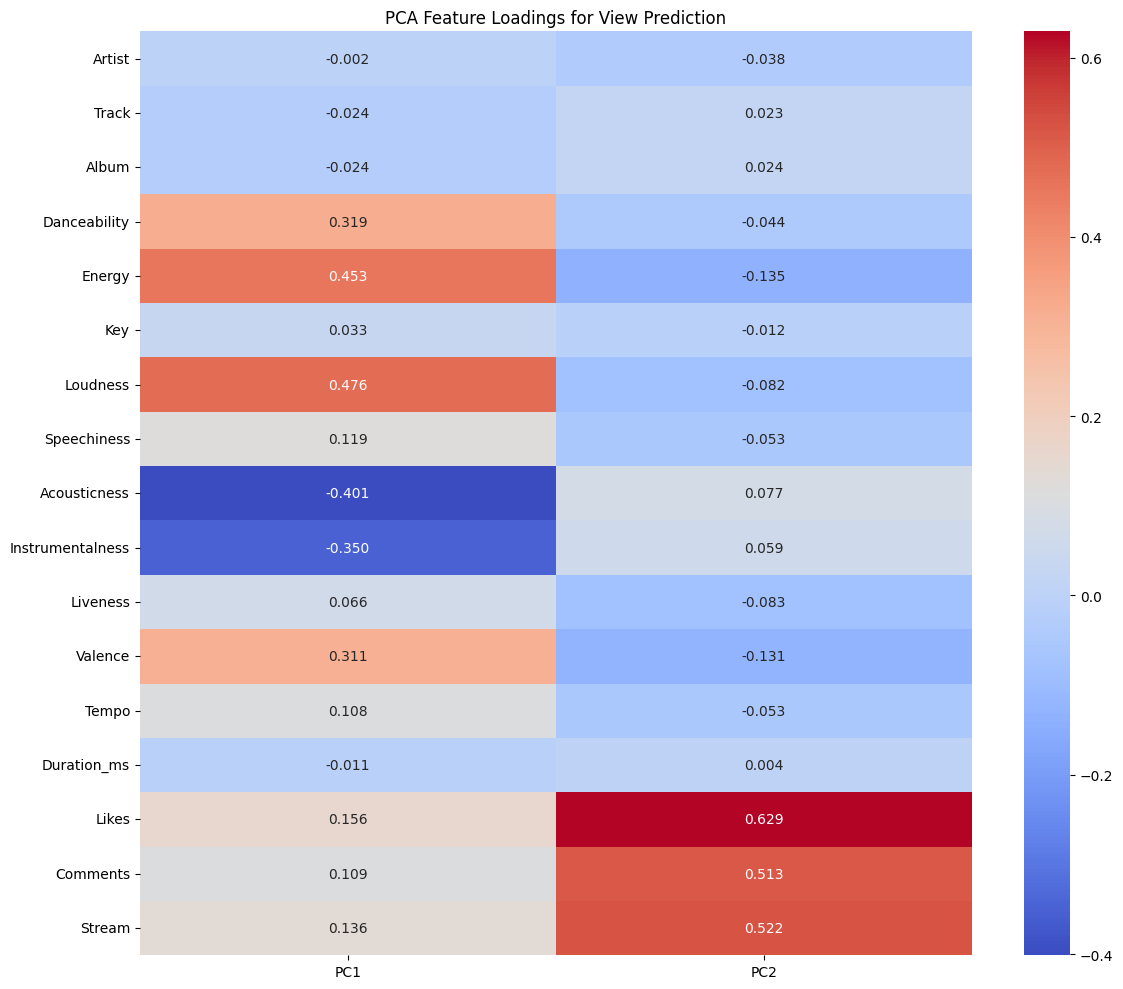

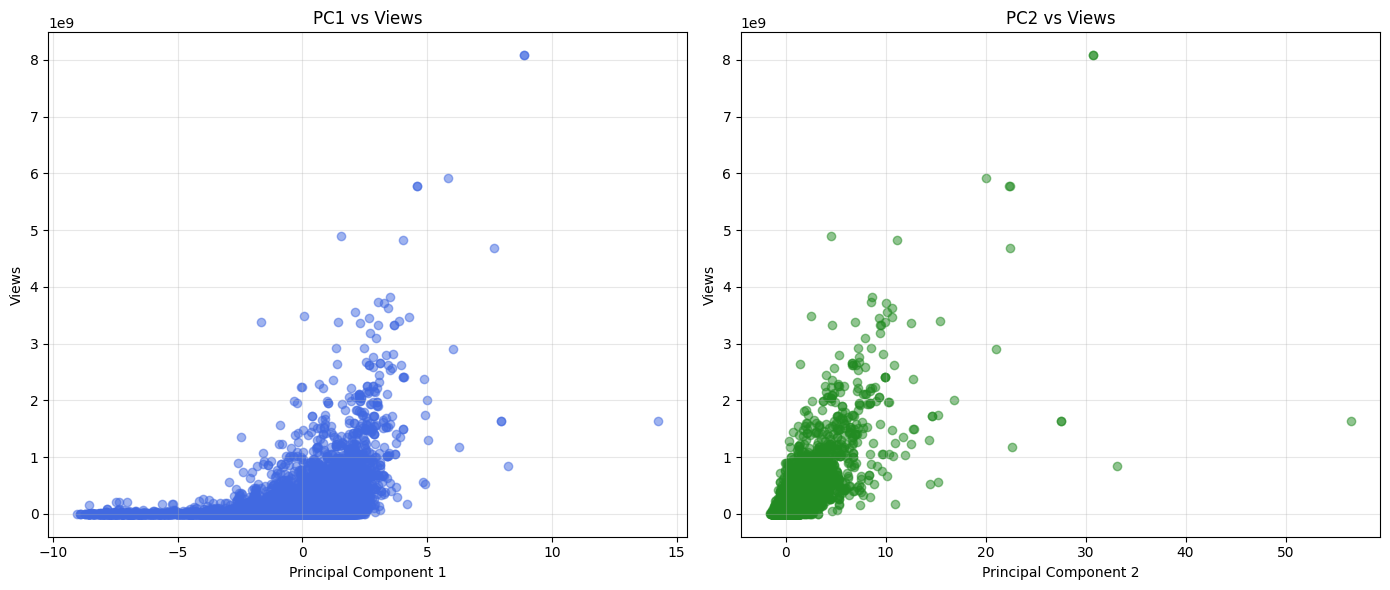

In [30]:
print("\n--- 6.6: PCA Analysis for View Prediction ---")

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# We need to work with only numerical features for PCA (excluding our target variable Views)
numeric_features = df.select_dtypes(include=['float64', 'int64'])

# Make sure to remove the target variable (Views) from the features for PCA
if TARGET_COLUMN in numeric_features.columns:
    target_views = numeric_features[TARGET_COLUMN].copy()
    numeric_features = numeric_features.drop(columns=[TARGET_COLUMN])
    print(f"Target variable '{TARGET_COLUMN}' separated for visualization with PCA features")
else:
    print(f"Warning: Target variable '{TARGET_COLUMN}' not found in numeric features")
    # If we don't have Views in our dataframe at this point, something went wrong
    target_views = None

# Standardize the features (important for PCA)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)
print(f"Features standardized, shape: {scaled_features.shape}")

# Apply PCA with 2 components for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
print(f"PCA applied, reduced to {pca_result.shape[1]} dimensions")

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Add the target variable for coloring (only if we have it)
if target_views is not None:
    # For better visualization with a skewed target, we can log-transform Views
    log_views = np.log10(target_views + 1)  # Add 1 to avoid log(0)
    pca_df['Log_Views'] = log_views
    print(f"Added log-transformed {TARGET_COLUMN} for visualization")

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio: PC1 = {explained_variance[0]:.4f}, PC2 = {explained_variance[1]:.4f}")
print(f"Total variance explained: {sum(explained_variance):.4f}")

# Create a scatter plot of PCA results (2D)
plt.figure(figsize=(10, 8))
if target_views is not None:
    # Color by log-transformed Views
    scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], 
                       c=pca_df['Log_Views'], 
                       cmap='viridis', 
                       alpha=0.6)
    plt.colorbar(scatter, label=f'Log10({TARGET_COLUMN})')
    plt.title(f'PCA: Feature Projection with {TARGET_COLUMN} (log-scale) as Color')
else:
    # Simple scatter plot without target coloring
    plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
    plt.title('PCA: 2-Component Projection (without target variable)')

plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.1%} variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.1%} variance)')
plt.grid(alpha=0.3)
plt.savefig('pca_visualization_views.png')
print("PCA visualization saved as 'pca_visualization_views.png'")

# 3D PCA Visualization with 3 components
print("\n--- Creating 3D PCA Visualization ---")
# Rerun PCA with 3 components
pca_3d = PCA(n_components=3)
pca_result_3d = pca_3d.fit_transform(scaled_features)
explained_variance_3d = pca_3d.explained_variance_ratio_
print(f"PCA 3D applied, reduced to 3 dimensions")
print(f"Explained variance ratio: PC1={explained_variance_3d[0]:.4f}, PC2={explained_variance_3d[1]:.4f}, PC3={explained_variance_3d[2]:.4f}")
print(f"Total variance explained by 3 components: {sum(explained_variance_3d):.4f}")

# Create a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

if target_views is not None:
    # Create a color map based on log-transformed views
    log_views = np.log10(target_views + 1)
    scatter = ax.scatter(
        pca_result_3d[:, 0],  # PC1
        pca_result_3d[:, 1],  # PC2
        pca_result_3d[:, 2],  # PC3
        c=log_views,
        cmap='viridis',
        alpha=0.6,
        s=30  # Point size
    )
    fig.colorbar(scatter, ax=ax, label=f'Log10({TARGET_COLUMN})')
else:
    ax.scatter(
        pca_result_3d[:, 0],
        pca_result_3d[:, 1],
        pca_result_3d[:, 2],
        alpha=0.6,
        s=30
    )

ax.set_xlabel(f'PC1 ({explained_variance_3d[0]:.1%})')
ax.set_ylabel(f'PC2 ({explained_variance_3d[1]:.1%})')
ax.set_zlabel(f'PC3 ({explained_variance_3d[2]:.1%})')
ax.set_title('3D PCA Projection of Features')

# Add a grid
ax.grid(True)

# Save the figure
plt.savefig('pca_3d_visualization.png')
print("3D PCA visualization saved as 'pca_3d_visualization.png'")

# Feature importance in PCA
component_names = [f"PC{i+1}" for i in range(2)]
loadings = pd.DataFrame(
    pca.components_.T, 
    columns=component_names, 
    index=numeric_features.columns
)

# Display feature contributions to PCA components
print("\nFeature contributions to principal components:")
print(loadings)

# Plot the feature loadings
plt.figure(figsize=(12, 10))
loadings_plot = sns.heatmap(loadings, cmap='coolwarm', annot=True, fmt=".3f")
plt.title('PCA Feature Loadings for View Prediction')
plt.tight_layout()
plt.savefig('pca_loadings_views.png')
print("PCA loadings heatmap saved as 'pca_loadings_views.png'")

# Add a visualization to show how PC1 and PC2 correlate with Views
if target_views is not None:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # PC1 vs Views
    ax1.scatter(pca_df['PC1'], target_views, alpha=0.5, c='royalblue')
    ax1.set_xlabel('Principal Component 1')
    ax1.set_ylabel(TARGET_COLUMN)
    ax1.set_title(f'PC1 vs {TARGET_COLUMN}')
    ax1.grid(alpha=0.3)
    
    # PC2 vs Views
    ax2.scatter(pca_df['PC2'], target_views, alpha=0.5, c='forestgreen')
    ax2.set_xlabel('Principal Component 2')
    ax2.set_ylabel(TARGET_COLUMN)
    ax2.set_title(f'PC2 vs {TARGET_COLUMN}')
    ax2.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('pca_vs_views.png')
    print("PCA components vs Views visualization saved as 'pca_vs_views.png'")

In [31]:
print("\n--- 7: Splitting Data into Features (X) and Target (y) ---")
if TARGET_COLUMN not in df.columns:
    print(f"Error: Target column '{TARGET_COLUMN}' not found in DataFrame.")
    sys.exit(1)

X = df.drop(TARGET_COLUMN, axis=1)
y = df[TARGET_COLUMN]
print(f"Features shape (X): {X.shape}")
print(f"Target shape (y): {y.shape}")


--- 7: Splitting Data into Features (X) and Target (y) ---
Features shape (X): (19170, 20)
Target shape (y): (19170,)


In [32]:
print("\n--- 8: Splitting Data into Training and Testing Sets ---")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)
print(f"Data split into training and testing sets (test_size={TEST_SIZE}, random_state={RANDOM_STATE}).")



--- 8: Splitting Data into Training and Testing Sets ---
Data split into training and testing sets (test_size=0.2, random_state=42).


In [33]:
print("\n--- 9: Final Shapes ---")
print("Training features shape (X_train):", X_train.shape)
print("Testing features shape (X_test):", X_test.shape)
print("Training target shape (y_train):", y_train.shape)
print("Testing target shape (y_test):", y_test.shape)


--- 9: Final Shapes ---
Training features shape (X_train): (15336, 20)
Testing features shape (X_test): (3834, 20)
Training target shape (y_train): (15336,)
Testing target shape (y_test): (3834,)


In [34]:
print("\n--- 10: Basic Linear Regression Model ---")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

# Initialize and train the linear regression model
print("Training a basic linear regression model...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on both training and test sets
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Evaluate model performance
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = math.sqrt(train_mse)
test_rmse = math.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print("\nLinear Regression Model Performance:")
print(f"Training set MSE: {train_mse:.2f}")
print(f"Test set MSE: {test_mse:.2f}")
print(f"Training set RMSE: {train_rmse:.2f}")
print(f"Test set RMSE: {test_rmse:.2f}")
print(f"Training set MAE: {train_mae:.2f}")
print(f"Test set MAE: {test_mae:.2f}")
print(f"Training set R²: {train_r2:.4f}")
print(f"Test set R²: {test_r2:.4f}")

# Check for feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print("\nTop 10 most important features in linear regression model:")
print(feature_importance.head(10))

# Plot actual vs predicted values on test set
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Views')
plt.ylabel('Predicted Views')
plt.title('Linear Regression: Actual vs Predicted Views (Test Set)')
plt.grid(alpha=0.3)
plt.savefig('linear_regression_actual_vs_predicted.png')
print("Linear regression actual vs predicted plot saved as 'linear_regression_actual_vs_predicted.png'")

# Plot residuals
plt.figure(figsize=(10, 8))
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Views')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residuals Plot')
plt.grid(alpha=0.3)
plt.savefig('linear_regression_residuals.png')
print("Linear regression residuals plot saved as 'linear_regression_residuals.png'")

# Try a log transformation for better visualization
plt.figure(figsize=(10, 8))
plt.scatter(np.log10(y_test + 1), np.log10(y_test_pred + 1), alpha=0.5)
plt.plot([0, np.log10(y_test.max() + 1)], [0, np.log10(y_test.max() + 1)], 'r--')
plt.xlabel('Log10(Actual Views)')
plt.ylabel('Log10(Predicted Views)')
plt.title('Linear Regression: Log-transformed Actual vs Predicted Views')
plt.grid(alpha=0.3)
plt.savefig('linear_regression_log_transformed.png')
print("Log-transformed actual vs predicted plot saved as 'linear_regression_log_transformed.png'")

print("\n--- Basic Linear Regression Analysis Complete ---") 


--- 10: Basic Linear Regression Model ---
Training a basic linear regression model...


ValueError: could not convert string to float: 'single'